In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 477kB/s 
     |████████████████████████████████| 2.7MB 44.7MB/s 


In [2]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Hannanum

kkma=Kkma()
okt=Okt()
hannanum=Hannanum()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
!pip install wordcloud

In [0]:
import konlpy
import nltk
import numpy as np

from wordcloud import WordCloud, STOPWORDS

from PIL import Image
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [5]:
### 나눔 고딕 설치
!apt-get update -qq # 설치를 업데이트 -qq : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum* => ttf-nanum, ttf-nanum-coding, ttf-n

Selecting previously unselected package fonts-nanum.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [6]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# gensim 모듈 추가 (1)
from gensim import corpora
from gensim import models

In [14]:
import pandas as pd

df=pd.read_excel("math_func_type.xlsx",sheet_name=1)
df.head()

,질문,수식풀이
0,그림과 같이 22를 넣었더니 18이 나왔습니다. 31을 넣으면 얼마가 나오겠습니까?,22-[4]=18 22-18=[4] 31-4=[27]
1,13을 넣으면 5가 나오는 상자가 있습니다. 9를 넣으면 얼마가 나오겠습니까?,13-[8]=5 13-5=[8] 9-8=[1]
2,그림과 같이 17을 넣으면 6이 나오는 상자가 있습니다. 24를 넣으면 얼마가 나오...,17-[9]=6 17-6=[9] 24-9=[15]
3,그림과 같이 18을 넣으면 13이 나오는 요술 주머니가 있습니다. 51을 넣으면 ...,18-[5]=13 18-13=[5] 51-5=[46]
4,다음 그림과 같이 어떤 수를 넣으면 일정한 수만큼 빼서 나오는 상자가 있습니다. 예...,34-[9]=25 34-25=[9] 27-9=[18]


In [0]:
documents=[]

for i in range(0,len(df)):
    documents.append(df["질문"][i])

In [16]:
documents

['그림과 같이 22를 넣었더니 18이 나왔습니다.  31을 넣으면 얼마가 나오겠습니까?',
 '13을 넣으면 5가 나오는 상자가 있습니다. 9를 넣으면 얼마가 나오겠습니까?',
 '그림과 같이 17을 넣으면 6이 나오는 상자가 있습니다. 24를 넣으면 얼마가 나오겠습니까?',
 '그림과 같이 18을 넣으면 13이 나오는 요술 주머니가 있습니다.  51을 넣으면 몇이 나옵니까?',
 '다음 그림과 같이 어떤 수를 넣으면 일정한 수만큼 빼서 나오는 상자가 있습니다. 예를 들어 34를 넣으면 25가 나옵니다. 이 상자에 27을 넣으면 얼마가 나옵니까?',
 '45를 넣으면 30이 나오는 상자가 있습니다. 이 상자에 52를 넣으면 어떤 수가 나오겠습니까?',
 '다음 그림과 같이 어떤 수를 넣으면 일정한 수만큼 빼서 나오는 상자가 있습니다. 예를 들어 25를 넣으면 17이 나옵니다. 이 상자에 27을 넣으면 얼마가 나옵니까?',
 '36을 넣으면 17이 나오는 상자가 있습니다. 이 상자에 50을 넣으면 얼마가 나옵니까?',
 '그림과 같이 32를 넣으면 14가 나오는 상자 가 있습니다. 이 상자에 45를 넣으면 얼마가 나옵니까?',
 '29를 넣으면 16이 나오는 상자가 있습니다. 이 상자에 72를 넣으면 얼마가 나옵니까?',
 '245를 넣으면 127이 나오는 상자가 있습니다. 이 상자에 396을 넣으면 얼마가 나옵니까?',
 '483를 넣으면 386이 나오는 상자가 있습니다. 이 상자에 572를 넣으면 얼마가 나옵니까?',
 '194를 넣으면 36이 나오는 상자가 있습니다. 이 상자에 342를 넣으면 얼마가 나옵니까?',
 '75를 넣으면 38이 나오는 상자가 있습니다. 이 상자에 56을 넣으면 얼마가 나옵니까?',
 '324를 넣으면 112가 나오는 상자가 있습니다. 이 상자에 632를 넣으면 얼마가 나옵니까?',
 '560을 넣으면 367이 나오는 상자가 있습니다. 이 상자에 407을 넣으면 얼마가 나옵니까?',
 '어떤 상자에 24를 넣었더니 17이 나왔습

In [17]:
type(documents[0])

str

In [27]:
stoplist = ('.!?\d')
texts=[[word for word in okt.morphs(doc) if word not in stoplist] for doc in documents]
texts[0]

['그림',
 '과',
 '같이',
 '22',
 '를',
 '넣었더니',
 '18',
 '이',
 '나왔습니다',
 '31',
 '을',
 '넣으면',
 '얼마',
 '가',
 '나오겠습니까']

In [28]:
# 사전과 코퍼스 만들기 (3)
# 사전만들기.
# dictionary는 bag-of-words를 이용하여 생성된 단어와 그 발생횟수를 나열.
dictionary = corpora.Dictionary(texts)
dictionary

In [29]:
len(list(dictionary))

554

In [30]:
# 코퍼스 만들기(벡터화)
# doc2bow()는 유닉크한 결과에서 단어의 출연횟수를 계산.
# 문서마다 단어ID와 그 발생빈도를 갖는 튜플.
corpus = [dictionary.doc2bow(text) for text in texts]
print ('corpus[0][0] : {}'.format(corpus[0][0]))

corpus[0][0] : (0, 1)


In [0]:
# 모델구축(4)
# lda 모델 정의 (기본적으로 corpus, num_topics, id2word)로 정의해야 한다.
# num_topics = 주제 개수,
# random_state 를 지정을 통해 임의의 값을 적용할 수 있다.
lda = models.ldamodel.LdaModel( corpus=corpus,
id2word=dictionary,
num_topics=5,
random_state = 1)

In [32]:
# 주제마다 출현 확률이 높은 단어 순으로 출력
for t in lda.show_topics():
  print(t)

(0, '0.065*"는" + 0.051*"개" + 0.032*"몇" + 0.026*"더" + 0.026*"," + 0.025*"이" + 0.019*"보다" + 0.019*"를" + 0.019*"가" + 0.018*"카드"')
(1, '0.054*"가" + 0.039*"이" + 0.035*"을" + 0.031*"에" + 0.029*"를" + 0.028*"넣으면" + 0.022*"상자" + 0.021*"개" + 0.018*"몇" + 0.014*"얼마"')
(2, '0.032*"가" + 0.029*"몇" + 0.025*"이" + 0.024*"를" + 0.024*"는" + 0.023*"마리" + 0.019*"에" + 0.018*"개" + 0.016*"장" + 0.015*","')
(3, '0.054*"를" + 0.050*"가" + 0.039*"개" + 0.034*"이" + 0.034*"넣으면" + 0.030*"몇" + 0.029*"상자" + 0.026*"있습니다" + 0.020*"에" + 0.019*"을"')
(4, '0.049*"는" + 0.041*"개" + 0.034*"몇" + 0.033*"를" + 0.031*"을" + 0.028*"고" + 0.027*"가지" + 0.027*"구슬" + 0.023*"가" + 0.017*"더"')


In [0]:
#시각화[5]
import matplotlib.pyplot as plt
from wordcloud import WordCloud

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체

wc = WordCloud(background_color="white",
               max_words=2000,
               contour_width=3, contour_color='steelblue',
               font_path=path)

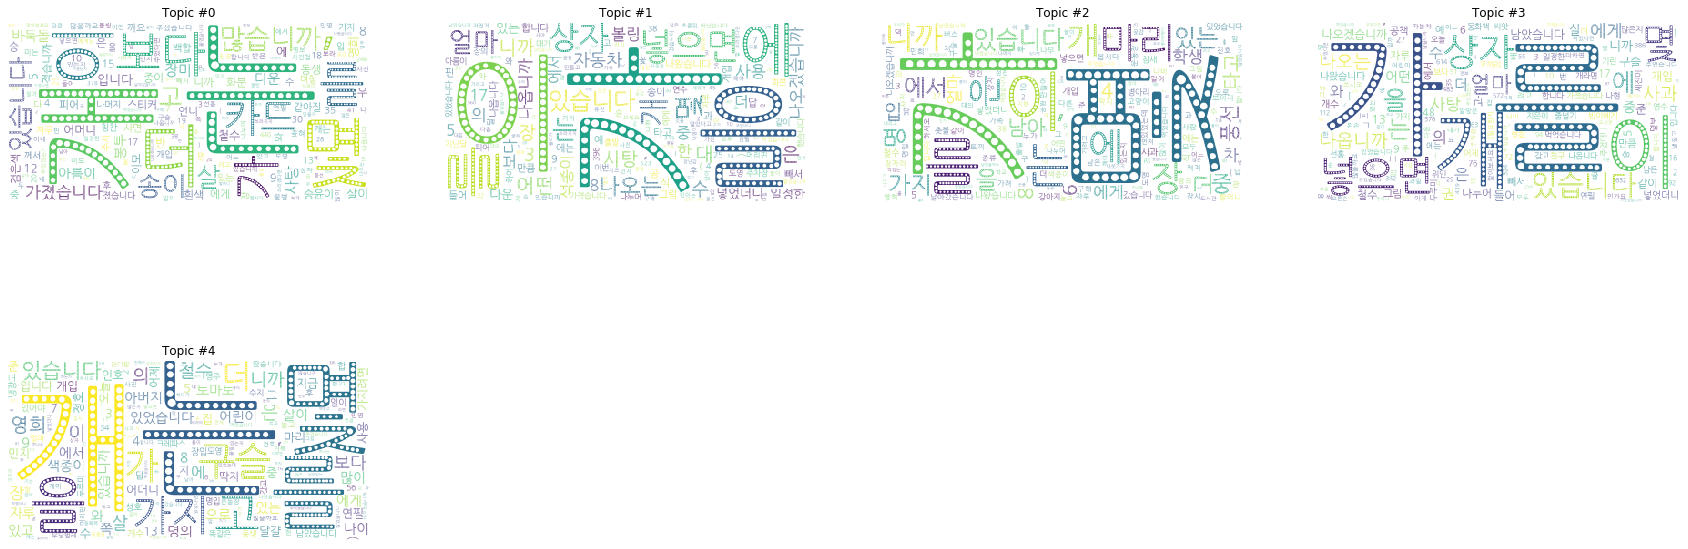

In [34]:
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
  plt.subplot(5,4,t+1)
  x = dict(lda.show_topic(t,200))
  im = wc.generate_from_frequencies(x)
  plt.imshow(im)
  plt.axis("off")
  plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud.png', bbox_inches='tight')